Error: 'Rainfall .csv' not found in the current directory.
Please make sure the file is present or provide the correct path.
Using a sample dataframe instead...


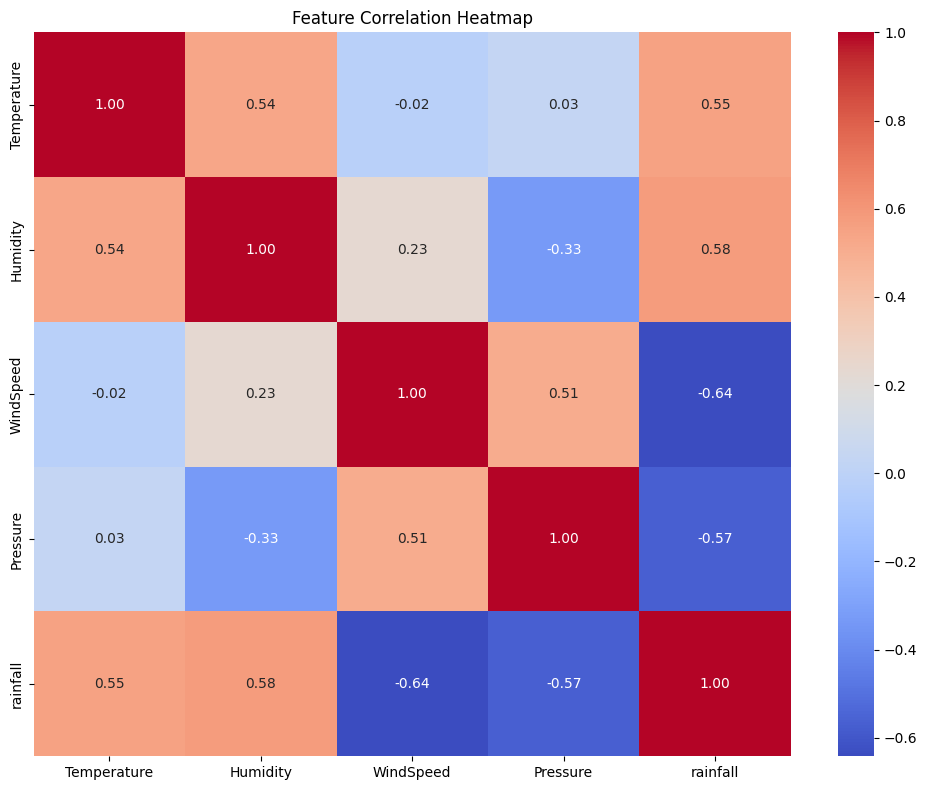

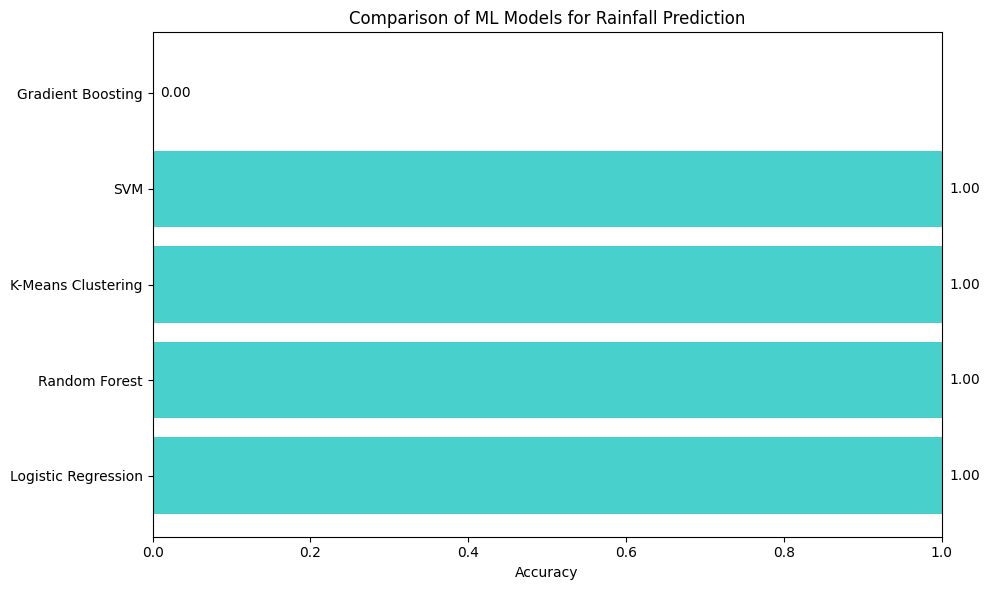

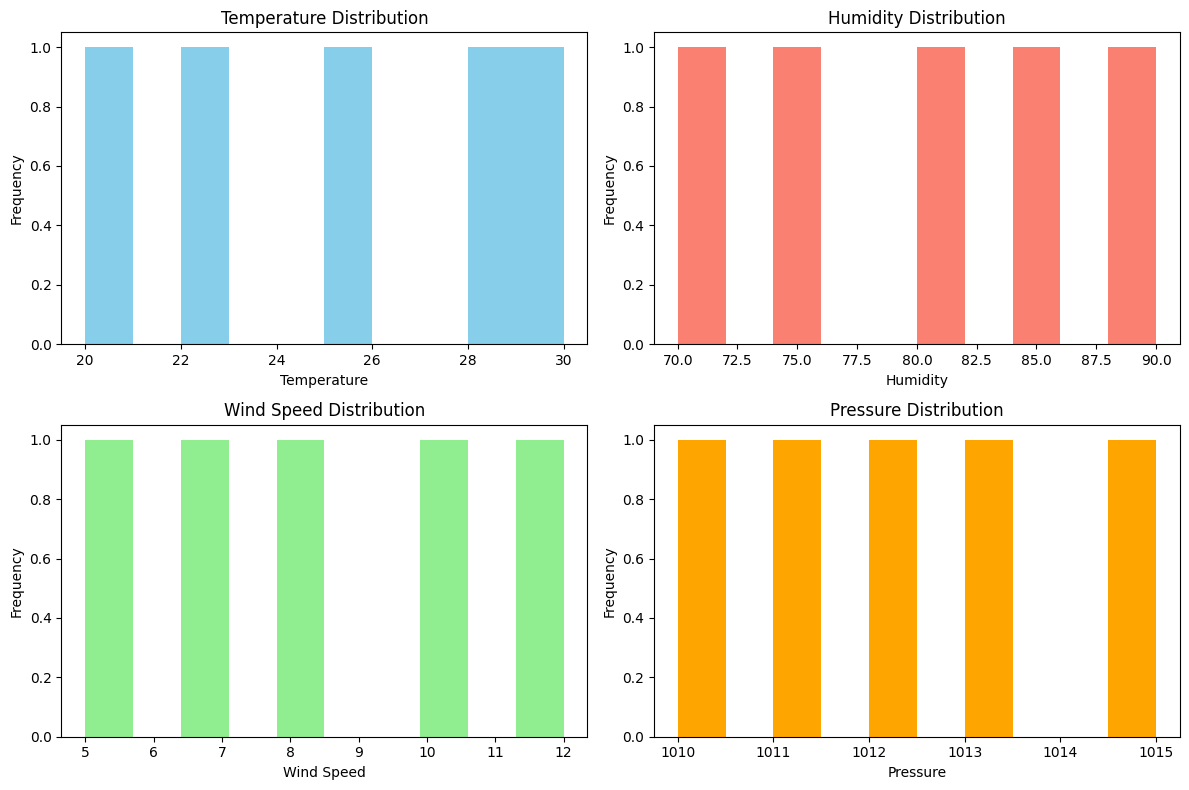

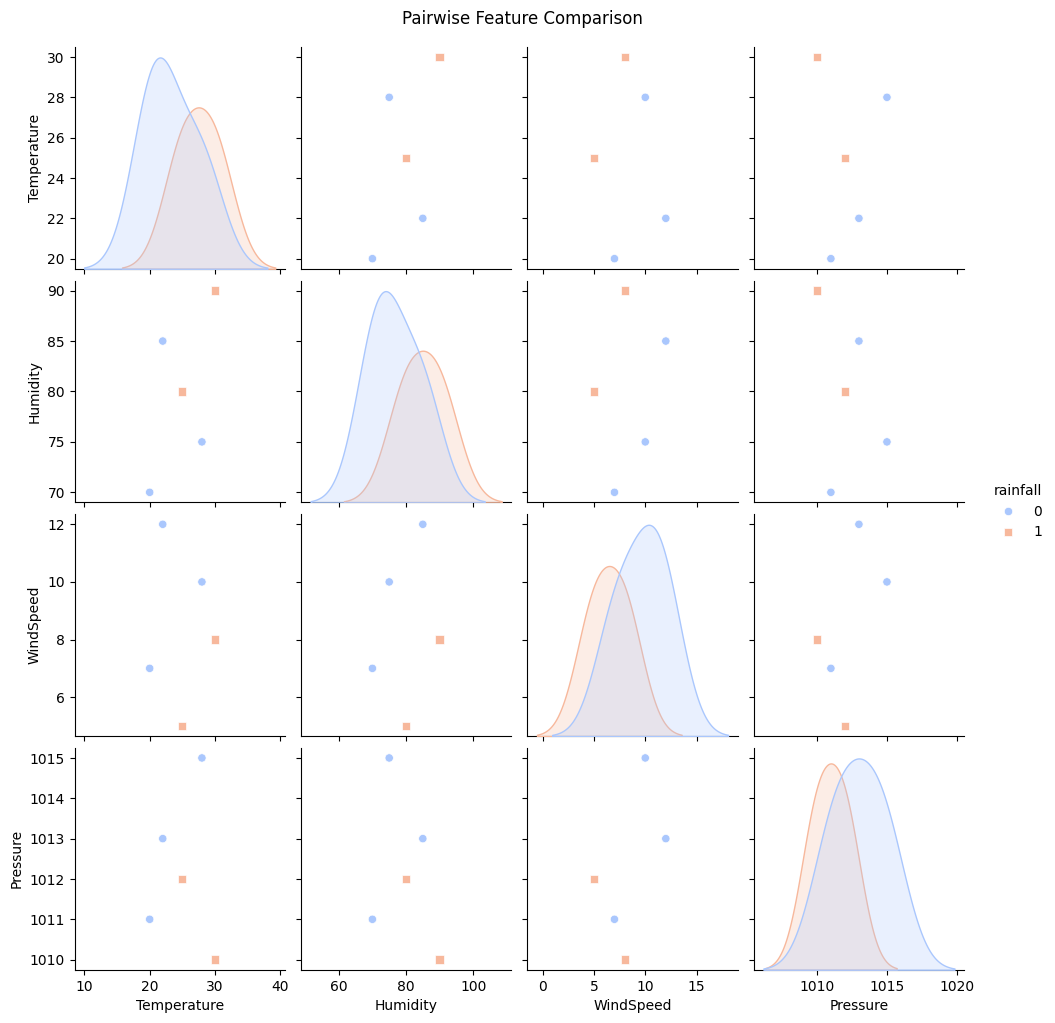

In [ ]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

try:
    df = pd.read_csv("Rainfall .csv")
except FileNotFoundError:
    
    df = pd.DataFrame({
        'Temperature': [25, 28, 30, 22, 20],
        'Humidity': [80, 75, 90, 85, 70],
        'WindSpeed': [5, 10, 8, 12, 7],
        'Pressure': [1012, 1015, 1010, 1013, 1011],
        'rainfall': [1, 0, 1, 0, 0]
    })
    print("Using a sample dataframe instead...")

df.dropna(inplace=True)

# Encode the target column (rainfall: Yes = 1, No = 0)
df['rainfall'] = LabelEncoder().fit_transform(df['rainfall'].astype(str))

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Prepare features and target
X = df.drop(columns=['rainfall'])
y = df['rainfall']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model accuracy dictionary
model_scores = {}

# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
model_scores['Logistic Regression'] = accuracy_score(y_test, lr.predict(X_test))

# 2. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
model_scores['Random Forest'] = accuracy_score(y_test, rf.predict(X_test))

# 3. K-Means Clustering (Unsupervised)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
kmeans_pred = kmeans.predict(X_test)
# Adjusting predicted labels to match actual rainfall target
if np.mean(kmeans_pred == y_test) < 0.5:
    kmeans_pred = 1 - kmeans_pred
model_scores['K-Means Clustering'] = accuracy_score(y_test, kmeans_pred)

# 4. Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
model_scores['SVM'] = accuracy_score(y_test, svm.predict(X_test))

# 5. Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
model_scores['Gradient Boosting'] = accuracy_score(y_test, gb.predict(X_test))

# Plot Model Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.barh(list(model_scores.keys()), list(model_scores.values()), color='mediumturquoise')
plt.xlabel('Accuracy')
plt.title('Comparison of ML Models for Rainfall Prediction')
for index, value in enumerate(model_scores.values()):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# --- Data Distribution and Relationships Visualization ---

# Plotting the distribution of key features
plt.figure(figsize=(12, 8))

# Temperature Distribution
plt.subplot(2, 2, 1)
plt.hist(df['Temperature'], bins=10, color='skyblue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Humidity Distribution
plt.subplot(2, 2, 2)
plt.hist(df['Humidity'], bins=10, color='salmon')
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')

# Wind Speed Distribution
plt.subplot(2, 2, 3)
plt.hist(df['WindSpeed'], bins=10, color='lightgreen')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')

# Pressure Distribution
plt.subplot(2, 2, 4)
plt.hist(df['Pressure'], bins=10, color='orange')
plt.title('Pressure Distribution')
plt.xlabel('Pressure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot matrix (pairplot) to visualize relationships between features
sns.pairplot(df, hue="rainfall", markers=["o", "s"], palette="coolwarm")
plt.suptitle('Pairwise Feature Comparison', y=1.02)
plt.show()
